# Проект: Анализ вакансий в сфере Data Science

## Команда и распределение задач

**Участники команды:**

- Гиллер Александр: Этап 0 (парсинг данных, 'geekjob_vacancies.csv'), Этап 1 (предобработка csv)
- Ефимов Алексей: Этап 0 (парсинг данных, 'superjob_vacancies.csv'), Этап 1 (предобработка csv)
- Марокина Татьяна: Этап 0 (парсинг данных, 'hhru_vacancies.csv'), Этап 1 (предобработка csv), Этап 2 (создание признаков), Этап 3 (разведывательный анализ)
- Соломонов Егор: Этап 0 (парсинг данных, 'timejobs_vacancies.csv'), Этап 1 (предобработка csv), Этап 2 (создание признаков), Этап 3 (разведывательный анализ), Этап 4 (визуализация)


# Этап 0: Парсинг и загрузка полученных данных в формате csv

💡 В данном проекте был выполнен парсинг с 4 веб-площадок с предложениями о работе (вакансиями)

- `timesjobs_web_scrapping.py` - парсинг вакансий с международной площадки time_jobs
- `hhru_web_scrapping.ipynb` - парсинг вакансий с HeadHunter
- `superjob_web_scrapping.ipynb` - парсинг вакансий с SuperJob
- `geekjob_web_scrapping.ipynb` - парсинг вакансий с GeekJob

💡 После сбора данных, были использованы четыре датасета с вакансиями:

- `timejobs_vacancies.csv` - вакансии с международной площадки time_jobs
- `hh_vacancies.csv` - вакансии с HeadHunter
- `superjob_vacancies.csv` - вакансии с SuperJob
- `geekjob_vacancies.csv` - вакансии с GeekJob


### Настройка отображения и импорт необходимых библиотек

In [1]:
#!pip install pandas matplotlib seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Настройка отображения
pd.set_option("display.max_columns", None)
plt.style.use("seaborn-v0_8-darkgrid")
sns.set_palette("husl")

### Загрузка датасетов в отдельные датафреймы

In [2]:
# Загрузка первого датасета
df1 = pd.read_csv("timejobs_vacancies.csv", sep=";", encoding="utf-8")
print(
    f"Датасет 1 (timejobs_vacancies.csv): {df1.shape[0]} строк, {df1.shape[1]} столбцов"
)
display(df1.head(3))

# Загрузка второго датасета
df2 = pd.read_csv("hhru_vacancies.csv", encoding="utf-8")
print(f"Датасет 2 (hhru_vacancies.csv): {df2.shape[0]} строк, {df2.shape[1]} столбцов")
display(df2.head(3))

# Загрузка третьего датасета
df3 = pd.read_csv("superjob_vacancies.csv", encoding="utf-8")
print(
    f"Датасет 3 (superjob_vacancies.csv): {df3.shape[0]} строк, {df3.shape[1]} столбцов"
)
display(df3.head(3))

# Загрузка четвертого датасета
df4 = pd.read_csv("geekjob_vacancies.csv", encoding="utf-8")
print(
    f"Датасет 4 (geekjob_vacancies.csv): {df4.shape[0]} строк, {df4.shape[1]} столбцов"
)
display(df4.head(3))


Датасет 1 (timejobs_vacancies.csv): 1052 строк, 6 столбцов


,name,currency,experience,location,skills,link
0,Data Science,USD,3-5,Kolkata,"data analytics, functional analysis, predictiv...",NaN
1,Head Data Science,USD,10-15,Mumbai,"data analytics, big data analytics, consulting...",NaN
2,Data Science Expert-,USD,5-7,Chennai,"data analysis, sas, predictive analytics, line...",NaN


Датасет 2 (hhru_vacancies.csv): 985 строк, 7 столбцов


,name,salary,currency,experience,location,link,skills
0,Аналитик данных,600000,KZT,0,Астана / Казахстан,https://hh.ru/vacancy/127247637,NaN
1,Senior ML / Data Scientist,3500,USD,3–6,Минск / Беларусь,https://hh.ru/vacancy/128152732,"Python, pandas, XGBoost, SciPy, Numpy, Postgre..."
2,AI/ML инженер,150000,KZT,3–6,Алматы / Казахстан,https://hh.ru/vacancy/128004586,"Python, Обучение и развитие, Docker"


Датасет 3 (superjob_vacancies.csv): 255 строк, 10 столбцов


,Unnamed: 0,name,salary,currency,experience,location,skills,extra_data,link,isparsing
0,0,Аналитик данных (data-analyst + BI-analyst) в ...,0,RUB,1,Москва,SQL,0,https://russia.superjob.ru/vakansii/analitik-d...,1
1,1,Data Science,0,RUB,0,0,0,0,https://russia.superjob.ru/vakansii/it-interne...,1
2,2,Бизнес-аналитик,0,RUB,1,Москва,0,"Обязанности:, Коммуникации с бизнес-владельцам...",https://russia.superjob.ru/vakansii/biznes-ana...,1


Датасет 4 (geekjob_vacancies.csv): 49 строк, 9 столбцов


,name,salary,currency,experience,location,skills,link,industry,source
0,Lead Data Analyst,3000.0,USD,3-5,Санкт-Петербург/ Россия,"Аналитика, Data Science, Big Data",https://geekjob.ru/vacancy/69383f88e6cc3810650...,Логистика и транспорт,geekjob
1,System Analyst,9000.0,USD,3-5,Санкт-Петербург,"Аналитика, Data Science, Big Data",https://geekjob.ru/vacancy/6911f051e74ba724ff0...,SaaS/PaaS,geekjob
2,Web & App Analyst,3000.0,EUR,1-3,Санкт-Петербург,"Аналитика, Data Science, Big Data",https://geekjob.ru/vacancy/69247652224f5aa99d0...,"Консалтинг, профессиональные услуги",geekjob


### Выборка данных для анализа

➡️ Для проекта отберем вакансии (случайным образом) из каждого датасета (более 1000 строк)


In [3]:
np.random.seed(42)
DEFAULT_OBSERV = 400

df1_sample = df1.sample(
    n=min(DEFAULT_OBSERV if len(df1) >= DEFAULT_OBSERV else len(df1), len(df1)),
    random_state=42,
)
df2_sample = df2.sample(
    n=min(DEFAULT_OBSERV if len(df2) >= DEFAULT_OBSERV else len(df2), len(df2)),
    random_state=42,
)
df3_sample = df3.sample(
    n=min(DEFAULT_OBSERV if len(df3) >= DEFAULT_OBSERV else len(df3), len(df3)),
    random_state=42,
)
df4_sample = df4.sample(
    n=min(DEFAULT_OBSERV if len(df4) >= DEFAULT_OBSERV else len(df4), len(df4)),
    random_state=42,
)

print(f"Выборка из датасета 1: {len(df1_sample)} строк")
print(f"Выборка из датасета 2: {len(df2_sample)} строк")
print(f"Выборка из датасета 3: {len(df3_sample)} строк")
print(f"Выборка из датасета 4: {len(df4_sample)} строк")
print(
    f"Всего выбрано: {len(df1_sample) + len(df2_sample) + len(df3_sample) + len(df4_sample)} строк"
)

Выборка из датасета 1: 400 строк
Выборка из датасета 2: 400 строк
Выборка из датасета 3: 255 строк
Выборка из датасета 4: 49 строк
Всего выбрано: 1104 строк


---

# Этап 1: Предварительная обработка данных

### 1.1 Анализ структуры данных


💡 Итоговый датасет необходимо привести к следующему виду:

```bash
'name': string # Название вакансии
'salary': int  # Зарплата за месяц
'currency': string  # Валюта зарплаты
'experience': string  # Требуемый опыт в годах: 0, 1-3, 3-6, 6
'location': string  # Город / Страна размещения вакансии:  'Москва / Россия'
'skills': string  # Требуемый Стэк, ключевые навыки: 'SQL, NoSQL, Python, Базы данных, Big Data'. Разделитель: - запятая, пробел
'link': string  # ссылка на вакансию
```


➡️ Удаляем пустые строки

In [4]:
df1_sample = df1_sample.dropna(subset=["name"], how="any").reset_index(drop=True)
df2_sample = df2_sample.dropna(subset=["name"], how="any").reset_index(drop=True)
df3_sample = df3_sample.dropna(subset=["name"], how="any").reset_index(drop=True)
df4_sample = df4_sample.dropna(subset=["name"], how="any").reset_index(drop=True)

➡️ Проверим типы данных в колонках и скорректируем по возможности

In [5]:
# Ожидаемые колонки и их типы
EXPECTED_COLUMNS = {
    "name": "string",
    "salary": "int",
    "currency": "string",
    "experience": "string",
    "location": "string",
    "skills": "string",
    "link": "string",
}


def validate_datasets(datasets):
    """
    Проверить наличие колонок и типы колонок в датасетах.

    Parameters:
        datasets: список датафреймов для проверки

    Return:
        Словарь с результатами валидации
    """

    type_mapping = {
        "string": ["object", "string"],
        "int": ["int64"],
    }

    results = {}

    for idx, df in enumerate(datasets):
        dataset_result = {
            "missing_columns": [],
            "extra_columns": [],
            "wrong_types": [],
            "correct_columns": [],
            "status": "OK",
        }

        current_columns_set = set(df.columns)
        expected_columns_set = set(EXPECTED_COLUMNS.keys())

        # Проверка отсутствующих колонок
        missing = expected_columns_set - current_columns_set
        if missing:
            dataset_result["missing_columns"] = list(missing)
            dataset_result["status"] = "ERROR"

        # Проверка лишних колонок
        extra = current_columns_set - expected_columns_set
        if extra:
            dataset_result["extra_columns"] = list(extra)
            dataset_result["status"] = "ERROR"

        # Проверка типов существующих колонок
        for col in expected_columns_set:
            if col in df.columns:
                expected_type = EXPECTED_COLUMNS[col]
                current_type = str(df[col].dtype)
                is_correct = current_type in type_mapping[expected_type]

                if is_correct:
                    dataset_result["correct_columns"].append(col)
                else:
                    dataset_result["wrong_types"].append(
                        {
                            "column": col,
                            "expected": expected_type,
                            "actual": current_type,
                        }
                    )
                    dataset_result["status"] = "ERROR"

        results[idx + 1] = dataset_result

    all_ok = all(r["status"] == "OK" for r in results.values())
    if all_ok:
        print("Все датасеты прошли валидацию!")
    else:
        print("Обнаружены проблемы в датасетах")
        for name, result in results.items():
            if result["status"] != "OK":
                print(f"   - {name}: {result['status']}")

    return results


def clean_empty_strings(df):
    """
    Заменить пустые строки и их вариации на NaN в строковых полях.

    Parameters:
        df: датафрейм для обработки

    Return:
        Датафрейм с замененными нулями
    """

    df_cleaned = df.copy()
    string_columns = ["name", "currency", "location", "skills", "link"]

    for col in string_columns:
        if col in df_cleaned.columns:
            # маска для всех вариантов пустых значений
            mask = (
                df_cleaned[col].isna()
                | (df_cleaned[col].astype(str).str.strip() == "")
                | (df_cleaned[col].astype(str).str.lower() == "nan")
                | (df_cleaned[col].astype(str).str.lower() == "none")
                | (df_cleaned[col] == 0)
                | (df_cleaned[col] == "0")
            )
            df_cleaned.loc[mask, col] = np.nan

    return df_cleaned


def fix_column_types(df, replace_zeros=True):
    """
    Исправть типы колонок

    Parameters:
        df: датафрейм для исправления

    Return:
        Датафрейм с исправленными типами
    """

    df_fixed = df.copy()

    for col, expected_type in EXPECTED_COLUMNS.items():
        if col in df_fixed.columns:
            # преобразование в string
            if expected_type == "string":
                df_fixed[col] = df_fixed[col].astype(str)

            elif expected_type == "int":
                # преобразование в int
                df_fixed[col] = pd.to_numeric(df_fixed[col], errors="coerce")
                # Заполняем NaN нулями
                df_fixed[col] = df_fixed[col].fillna(0).astype(int)

    # заменяем пустые значения в строковых полях, если требуется
    if replace_zeros:
        df_fixed = clean_empty_strings(df_fixed)

    return df_fixed

In [6]:
results = validate_datasets([df1_sample, df2_sample, df3_sample, df4_sample])
for key, val in results.items():
    print(key, val)

Обнаружены проблемы в датасетах
   - 1: ERROR
   - 3: ERROR
   - 4: ERROR
1 {'missing_columns': ['salary'], 'extra_columns': [], 'wrong_types': [{'column': 'link', 'expected': 'string', 'actual': 'float64'}], 'correct_columns': ['experience', 'name', 'location', 'currency', 'skills'], 'status': 'ERROR'}
2 {'missing_columns': [], 'extra_columns': [], 'wrong_types': [], 'correct_columns': ['experience', 'name', 'location', 'salary', 'currency', 'link', 'skills'], 'status': 'OK'}
3 {'missing_columns': [], 'extra_columns': ['isparsing', 'extra_data', 'Unnamed: 0'], 'wrong_types': [{'column': 'experience', 'expected': 'string', 'actual': 'int64'}], 'correct_columns': ['name', 'location', 'salary', 'currency', 'link', 'skills'], 'status': 'ERROR'}
4 {'missing_columns': [], 'extra_columns': ['source', 'industry'], 'wrong_types': [{'column': 'salary', 'expected': 'int', 'actual': 'float64'}], 'correct_columns': ['experience', 'name', 'location', 'currency', 'link', 'skills'], 'status': 'ERROR'

➡️ Обработаем некорректные типы для колонок `wrong_types` и все пустые значения преобразуем в валидный `np.nan`


In [7]:
df1_sample = fix_column_types(df1_sample)
df3_sample = fix_column_types(df3_sample)
df4_sample = fix_column_types(df4_sample)

In [8]:
results = validate_datasets([df1_sample, df2_sample, df3_sample, df4_sample])
for key, val in results.items():
    print(key, val)

Обнаружены проблемы в датасетах
   - 1: ERROR
   - 3: ERROR
   - 4: ERROR
1 {'missing_columns': ['salary'], 'extra_columns': [], 'wrong_types': [], 'correct_columns': ['experience', 'name', 'location', 'currency', 'link', 'skills'], 'status': 'ERROR'}
2 {'missing_columns': [], 'extra_columns': [], 'wrong_types': [], 'correct_columns': ['experience', 'name', 'location', 'salary', 'currency', 'link', 'skills'], 'status': 'OK'}
3 {'missing_columns': [], 'extra_columns': ['isparsing', 'extra_data', 'Unnamed: 0'], 'wrong_types': [], 'correct_columns': ['experience', 'name', 'location', 'salary', 'currency', 'link', 'skills'], 'status': 'ERROR'}
4 {'missing_columns': [], 'extra_columns': ['source', 'industry'], 'wrong_types': [], 'correct_columns': ['experience', 'name', 'location', 'salary', 'currency', 'link', 'skills'], 'status': 'ERROR'}


➡️ Удалим лишние колонки `extra_columns`, так как мы не планируем использовать их в обработке или нормализации данных


In [9]:
del df3_sample["isparsing"]
del df3_sample["extra_data"]
del df3_sample["Unnamed: 0"]
del df4_sample["source"]
del df4_sample["industry"]

In [10]:
results = validate_datasets([df1_sample, df2_sample, df3_sample, df4_sample])
for key, val in results.items():
    print(key, val)

Обнаружены проблемы в датасетах
   - 1: ERROR
1 {'missing_columns': ['salary'], 'extra_columns': [], 'wrong_types': [], 'correct_columns': ['experience', 'name', 'location', 'currency', 'link', 'skills'], 'status': 'ERROR'}
2 {'missing_columns': [], 'extra_columns': [], 'wrong_types': [], 'correct_columns': ['experience', 'name', 'location', 'salary', 'currency', 'link', 'skills'], 'status': 'OK'}
3 {'missing_columns': [], 'extra_columns': [], 'wrong_types': [], 'correct_columns': ['experience', 'name', 'location', 'salary', 'currency', 'link', 'skills'], 'status': 'OK'}
4 {'missing_columns': [], 'extra_columns': [], 'wrong_types': [], 'correct_columns': ['experience', 'name', 'location', 'salary', 'currency', 'link', 'skills'], 'status': 'OK'}


### 1.2 Обработка поля salary
⚠️
**Проблема:** В датасетах может отсутствовать колонка salary или содержаться пропуски (нули).

💻
**Решение:**

1. Проверим наличие колонки salary

2. Если колонки нет - создадим ее и заполним пропуски на основе опыта работы (experience) используя коэффициенты.

3. Если колонка есть - заполним только пропуски на основе опыта работы


In [11]:
import random

# Коэффициенты для расчета зарплаты на основе опыта
coeff = {
    0: (0.9, 1),
    1: (1.1, 1.2),
    2: (1.4, 1.5),
    3: (2, 2.3),
    4: (2.5, 2.7),
    5: (2.8, 3.1),
    6: (3.2, 3.4),
    7: (3.6, 3.9),
    8: (4.1, 4.4),
    9: (4.5, 4.8),
    10: (5.3, 5.8),
    11: (6.2, 6.7),
    12: (7.2, 8.1),
    13: (8.2, 8.5),
    14: (8.6, 8.9),
    15: (9.1, 10),
}


def determine_wage(exp: str, base: int):
    """
    Определить зарплату на основе опыта работы

    Parameters:
    -----------
    exp : str
        Строка с опытом работы (например, "3-5", "0", "6")
    base : int
        Базовая зарплата для расчета

    Return:
    --------
    int
        Рассчитанная зарплата
    """
    if pd.isna(exp) or exp == "0" or exp == 0:
        min_exp = 0
    else:
        # Нормализация тире
        exp_str = str(exp).replace("–", "-")
        if "-" in exp_str:
            start, _ = exp_str.split("-")
            min_exp = int(start) if start.isdigit() else 0
        else:
            min_exp = int(exp_str) if exp_str.isdigit() else 0

    min_exp = min(min_exp, 15)
    coef_range = coeff.get(min_exp, (1, 1.2))
    return round(base * random.uniform(coef_range[0], coef_range[1]))


def is_empty_salary(value):
    """
    Проверить, является ли значение зарплаты пустым

    Parameters:
    -----------
    value : any
        Значение для проверки

    Return:
    --------
    bool
        True если значение пустое, False иначе
    """
    if pd.isna(value) or value == 0:
        return True

    return False


def process_salary_column(df):
    """
    Обработать колонку salary в датафрейме
    Если колонки нет - создаем ее
    Если есть - заполнить только пропуски

    Parameters:
    -----------
    df : pd.DataFrame
        Датафрейм для обработки

    Return:
    --------
    pd.DataFrame
        Датафрейм с обработанной колонкой salary
    """

    # Определяем базовую зарплату в зависимости от валюты
    if "currency" in df.columns:
        currency = (
            df["currency"].mode()[0] if not df["currency"].isna().all() else "RUB"
        )
        base_salary = {
            "USD": 1500,
            "RUB": 100000,
            "KZT": 500000,
            "BYN": 3000,
            "EUR": 1800,
        }.get(currency, 100000)
        print(f"\nОпределена валюта: {currency}, базовая зарплата: {base_salary}")
    else:
        base_salary = 100000
        print(f"\nКолонка 'currency' не найдена, используем базу: {base_salary} RUB")

    total_rows = len(df)

    # Проверка наличия колонки salary
    if "salary" not in df.columns:
        # Создаем колонку и заполняем все значения
        df["salary"] = df.apply(
            lambda row: determine_wage(row.get("experience", "0"), base=base_salary),
            axis=1,
        )
        print(f"Создано и заполнено {total_rows} значений")

    else:
        # Подсчет пустых значений ДО обработки
        empty_mask = df["salary"].apply(is_empty_salary)
        empty_count = empty_mask.sum()
        filled_count = total_rows - empty_count

        print("\nДО обработки:")
        print(f"Всего строк: {total_rows}")
        print(f"Заполнено: {filled_count}")
        print(f"Пропуски/пустые: {empty_count}")

        if empty_count > 0:
            # Заполняем только пустые значения
            df.loc[empty_mask, "salary"] = df.loc[empty_mask].apply(
                lambda row: determine_wage(
                    row.get("experience", "0"), base=base_salary
                ),
                axis=1,
            )

    # Конвертируем в числовой формат для анализа
    df["salary"] = pd.to_numeric(df["salary"], errors="coerce")

    # Финальная статистика
    final_missing = df["salary"].isna().sum()

    print("\nПОСЛЕ обработки:")
    print(f"Заполнено значений: {total_rows - final_missing}")
    print(f"Осталось пропусков: {final_missing}")

    return df


In [12]:
df1_sample = process_salary_column(df1_sample)


Определена валюта: USD, базовая зарплата: 1500
Создано и заполнено 400 значений

ПОСЛЕ обработки:
Заполнено значений: 400
Осталось пропусков: 0


In [13]:
df1_sample.head(3)

,name,currency,experience,location,skills,link,salary
0,Modelling & Data Science Director,USD,5-7,Bengaluru,"data science methods, analytics engagements, d...",NaN,4513
1,Principal Applied Sciences Manager,USD,3-9,"San Francisco, New York City","large language models, machine learning techni...",NaN,3372
2,Career Opportunities: Senior-Software Engineer...,USD,3-5,Mexico,"digital transformation, data science, engineer...",NaN,3309


In [14]:
df2_sample = process_salary_column(df2_sample)


Определена валюта: RUB, базовая зарплата: 100000

ДО обработки:
Всего строк: 400
Заполнено: 400
Пропуски/пустые: 0

ПОСЛЕ обработки:
Заполнено значений: 400
Осталось пропусков: 0


In [15]:
df2_sample.head(3)

,name,salary,currency,experience,location,link,skills
0,Системный аналитик / аналитик-тестировщик (R&D...,200000,RUB,3–6,Москва / Россия,https://hh.ru/vacancy/127846907,"API, SQL, Postman, Git, Клиент-серверная архит..."
1,UX/UI-дизайнер,3000,USD,3–6,Астана / Казахстан,https://hh.ru/vacancy/127326738,"Figma, UX, UI, Прототипирование, Minimal Viabl..."
2,Администратор WMS,114000,RUB,1–3,Санкт-Петербург / Россия,https://hh.ru/vacancy/126747432,NaN


In [16]:
df3_sample = process_salary_column(df3_sample)


Определена валюта: RUB, базовая зарплата: 100000

ДО обработки:
Всего строк: 255
Заполнено: 111
Пропуски/пустые: 144

ПОСЛЕ обработки:
Заполнено значений: 255
Осталось пропусков: 0


In [17]:
df3_sample.head(3)

,name,salary,currency,experience,location,skills,link
0,Финансовый аналитик,100000,RUB,1,Волгоград,NaN,https://russia.superjob.ru/vakansii/finansovyj...
1,Бизнес-аналитик (Стрим Состоятельные клиенты),117942,RUB,1,Москва,NaN,https://russia.superjob.ru/vakansii/biznes-ana...
2,Аналитик (отдел отраслевого анализа),229536,RUB,3,Москва,"MS Excel, Анализ данных, Сбор и анализ информации",https://russia.superjob.ru/vakansii/analitik-3...


In [18]:
df4_sample = process_salary_column(df4_sample)


Определена валюта: RUB, базовая зарплата: 100000

ДО обработки:
Всего строк: 38
Заполнено: 37
Пропуски/пустые: 1

ПОСЛЕ обработки:
Заполнено значений: 38
Осталось пропусков: 0


In [19]:
df4_sample.head(3)

,name,salary,currency,experience,location,skills,link
0,Аналитик DWH,130000,RUB,3-5,Санкт-Петербург,"Аналитика, Data Science, Big Data",https://geekjob.ru/vacancy/693127af1430309b2a0...
1,Системный аналитик/ System analyst,140000,RUB,1-3,Россия,Информационные технологии,https://geekjob.ru/vacancy/691b17699b304da6c00...
2,Аналитик (Junior+),1000,USD,1-3,Санкт-Петербург/ Россия,"Аналитика, Data Science, Big Data",https://geekjob.ru/vacancy/692d78497e31324c180...


### 1.3 Обработка поля skills

⚠️
**Решение:** Оставим NaN для пустых значений, так как это информативно (не все вакансии содержат детальное описание навыков).


In [20]:
print("Пропуски в skills:")
print(
    f"Датасет 1: {df1_sample['skills'].isnull().sum()} ({df1_sample['skills'].isnull().sum() / len(df1_sample) * 100:.1f}%)"
)
print(
    f"Датасет 2: {df2_sample['skills'].isnull().sum()} ({df2_sample['skills'].isnull().sum() / len(df2_sample) * 100:.1f}%)"
)
print(
    f"Датасет 3: {df3_sample['skills'].isnull().sum()} ({df3_sample['skills'].isnull().sum() / len(df3_sample) * 100:.1f}%)"
)
print(
    f"Датасет 4: {df4_sample['skills'].isnull().sum()} ({df4_sample['skills'].isnull().sum() / len(df4_sample) * 100:.1f}%)"
)

Пропуски в skills:
Датасет 1: 0 (0.0%)
Датасет 2: 127 (31.8%)
Датасет 3: 194 (76.1%)
Датасет 4: 0 (0.0%)


### 1.4 Проверка и удаление дубликатов


In [21]:
print(f"Дубликаты в датасете 1: {df1_sample.duplicated().sum()}")
print(f"Дубликаты в датасете 2: {df2_sample.duplicated().sum()}")
print(f"Дубликаты в датасете 3: {df3_sample.duplicated().sum()}")
print(f"Дубликаты в датасете 4: {df4_sample.duplicated().sum()}")

df1_sample = df1_sample.drop_duplicates()
df2_sample = df2_sample.drop_duplicates()
df3_sample = df3_sample.drop_duplicates()
df4_sample = df4_sample.drop_duplicates()

print(f"Размер датасета 1 после удаления дубликатов: {len(df1_sample)}")
print(f"Размер датасета 2 после удаления дубликатов: {len(df2_sample)}")
print(f"Размер датасета 3 после удаления дубликатов: {len(df3_sample)}")
print(f"Размер датасета 4 после удаления дубликатов: {len(df4_sample)}")

Дубликаты в датасете 1: 0
Дубликаты в датасете 2: 1
Дубликаты в датасете 3: 22
Дубликаты в датасете 4: 0
Размер датасета 1 после удаления дубликатов: 400
Размер датасета 2 после удаления дубликатов: 399
Размер датасета 3 после удаления дубликатов: 233
Размер датасета 4 после удаления дубликатов: 38


### 1.5 Объединение датасетов

In [22]:
# Добавляем колонку источника данных
df1_sample["source"] = "time_jobs"
df2_sample["source"] = "hhru"
df3_sample["source"] = "super_job"
df4_sample["source"] = "geek_job"

# колонки для объединения
common_columns = [
    "name",
    "salary",
    "currency",
    "experience",
    "location",
    "skills",
    "link",
    "source",
]

for col in common_columns:
    if col not in df1_sample.columns:
        df1_sample[col] = np.nan
    if col not in df2_sample.columns:
        df2_sample[col] = np.nan
    if col not in df3_sample.columns:
        df3_sample[col] = np.nan
    if col not in df4_sample.columns:
        df4_sample[col] = np.nan

# Объединяем датафреймы
df_combined = pd.concat(
    [
        df1_sample[common_columns],
        df2_sample[common_columns],
        df3_sample[common_columns],
        df4_sample[common_columns],
    ],
    ignore_index=True,
)

print(
    f"Объединенный датасет: {len(df_combined)} строк, {len(df_combined.columns)} колонок"
)

display(df_combined.head())

Объединенный датасет: 1070 строк, 8 колонок


,name,salary,currency,experience,location,skills,link,source
0,Modelling & Data Science Director,4513,USD,5-7,Bengaluru,"data science methods, analytics engagements, d...",NaN,time_jobs
1,Principal Applied Sciences Manager,3372,USD,3-9,"San Francisco, New York City","large language models, machine learning techni...",NaN,time_jobs
2,Career Opportunities: Senior-Software Engineer...,3309,USD,3-5,Mexico,"digital transformation, data science, engineer...",NaN,time_jobs
3,Principal Data Scientist - Digital Health,5672,USD,7-9,Bengaluru,"ai, ml expertise, advanced analytics, data pip...",NaN,time_jobs
4,Career Opportunities: Senior Manager (44626),4524,USD,5-10,Mexico,"data science expertise, technology innovation,...",NaN,time_jobs


# Этап 2: Создание новых признаков

➡️ Работаем с датасетом `df_combined`

In [23]:
df_combined.dtypes

name          object
salary         int64
currency      object
experience    object
location      object
skills        object
link          object
source        object
dtype: object

➡️ Создадим новые признаки, на основе результатов анализа которых можно будет выдвинуть исследовательские гипотезы.

⚠️ Анализ созданных признаков представлен в разделе 3.

### 2.1 Обработка выбросов в salary

Проверим наличие аномально высоких или низких значений зарплат.

⚠️
**Проблема:** Зарплаты указаны в разных валютах (USD, RUB, KZT, BYN, EUR), что делает прямое сравнение невозможным.

💻
**Решение:**

1. Конвертируем все зарплаты в единую валюту (RUB) - основная валюта для российского рынка
2. Проверим наличие выбросов
3. Обработаем аномальные значения

#### 2.1.1 Конвертация валют в RUB

In [24]:
# Курсы валют к рублю (примерные)
EXCHANGE_RATE_TO_RUB = {
    "RUB": 1.0,
    "USD": 90.0,  # 1 USD ~ 90 RUB
    "EUR": 100.0,  # 1 EUR ~ 100 RUB
    "KZT": 0.20,  # 1 KZT ~ 0.20 RUB (курс ~5 KZT за 1 RUB)
    "BYN": 28.0,  # 1 BYN ~ 28 RUB (курс ~3.2 BYN за 100 RUB)
}


def convert_to_rub(salary, currency):
    """
    Конвертировать зарплату в RUB

    Parameters:
    -----------
    salary : int
        Значение зарплаты
    currency : str
        Валюта (USD, RUB, KZT, BYN, EUR)

    Return:
    --------
    int
        Зарплата в RUB
    """

    currency = str(currency).upper().strip()
    rate = EXCHANGE_RATE_TO_RUB.get(currency, 1.0)

    return int(round(salary * rate))

In [25]:
df_combined["salary_rub"] = df_combined.apply(
    lambda row: convert_to_rub(row["salary"], row["currency"]), axis=1
)


#### 2.1.2 Статистика по зарплатам в RUB

In [26]:
df_combined

,name,salary,currency,experience,location,skills,link,source,salary_rub
0,Modelling & Data Science Director,4513,USD,5-7,Bengaluru,"data science methods, analytics engagements, d...",NaN,time_jobs,406170
1,Principal Applied Sciences Manager,3372,USD,3-9,"San Francisco, New York City","large language models, machine learning techni...",NaN,time_jobs,303480
2,Career Opportunities: Senior-Software Engineer...,3309,USD,3-5,Mexico,"digital transformation, data science, engineer...",NaN,time_jobs,297810
3,Principal Data Scientist - Digital Health,5672,USD,7-9,Bengaluru,"ai, ml expertise, advanced analytics, data pip...",NaN,time_jobs,510480
4,Career Opportunities: Senior Manager (44626),4524,USD,5-10,Mexico,"data science expertise, technology innovation,...",NaN,time_jobs,407160
...,...,...,...,...,...,...,...,...,...
1065,BI Аналитик,130000,RUB,3-5,Санкт-Петербург/ Россия,"Аналитика, Data Science, Big Data",https://geekjob.ru/vacancy/69390be0fb140711b30...,geek_job,130000
1066,Data Architect,300000,RUB,0,Germany,Информационные технологии,https://geekjob.ru/vacancy/69258ed174ad72cdcb0...,geek_job,300000
1067,Business/System Analyst / Бизнес/Системный ана...,130000,RUB,3-5,Россия,"Аналитика, Data Science, Big Data",https://geekjob.ru/vacancy/69301e4bdb6ea017010...,geek_job,130000
1068,Data Engineer,500000,RUB,3-5,Лимассол,"Аналитика, Data Science, Big Data",https://geekjob.ru/vacancy/691aa51ce67a84ed820...,geek_job,500000


In [27]:
stats_df = df_combined["salary_rub"].describe()
print(stats_df)


count    1.070000e+03
mean     3.792715e+05
std      4.887354e+06
min      1.250000e+04
25%      1.062500e+05
50%      1.700000e+05
75%      3.019725e+05
max      1.600000e+08
Name: salary_rub, dtype: float64


#### 2.1.3 Визуализация распределения зарплат в RUB

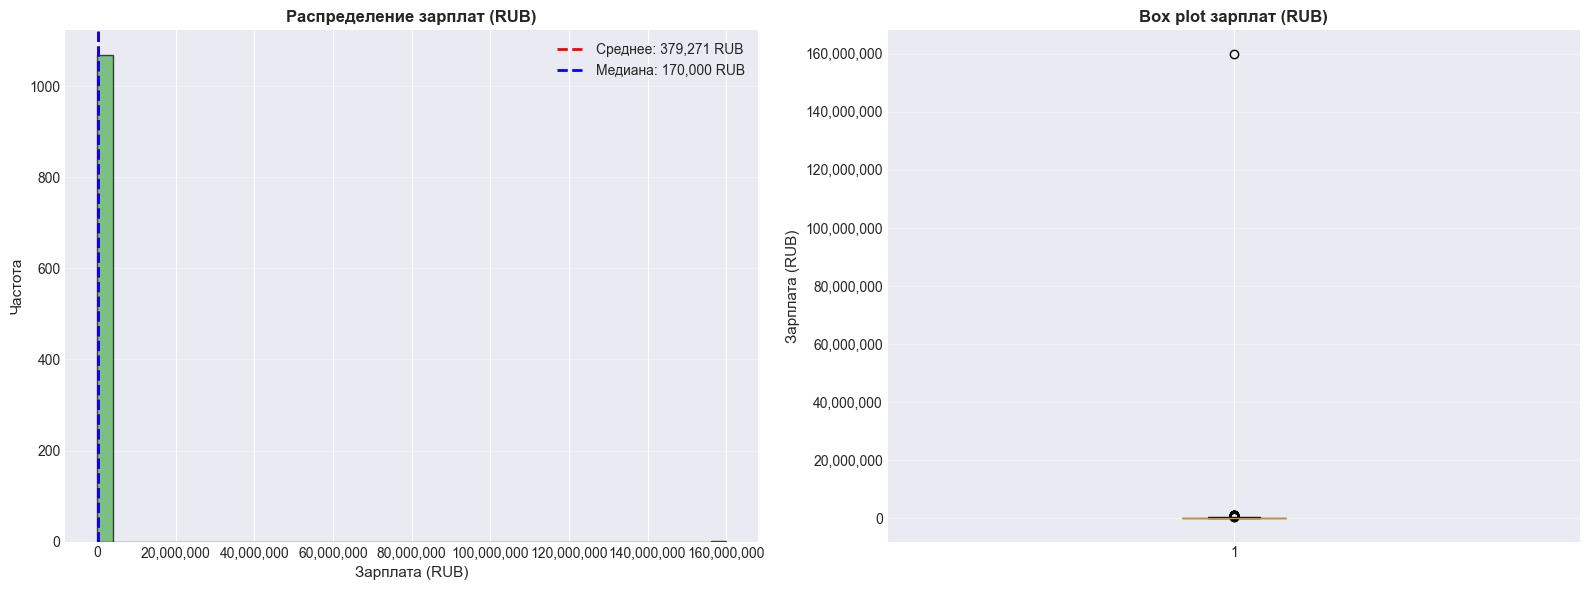

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# График 1: Гистограмма Распределение зарплат (RUB)
axes[0].hist(
    df_combined["salary_rub"].dropna(),
    bins=40,
    edgecolor="black",
    alpha=0.7,
    color="#4CAF50",
)
axes[0].set_title("Распределение зарплат (RUB)", fontsize=12, fontweight="bold")
axes[0].set_xlabel("Зарплата (RUB)", fontsize=11)
axes[0].set_ylabel("Частота", fontsize=11)
mean_salary_df = df_combined["salary_rub"].mean()
median_salary_df = df_combined["salary_rub"].median()
axes[0].axvline(
    mean_salary_df,
    color="red",
    linestyle="--",
    linewidth=2,
    label=f"Среднее: {mean_salary_df:,.0f} RUB",
)
axes[0].axvline(
    median_salary_df,
    color="blue",
    linestyle="--",
    linewidth=2,
    label=f"Медиана: {median_salary_df:,.0f} RUB",
)
axes[0].legend()
axes[0].grid(axis="y", alpha=0.3)
axes[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f"{x:,.0f}"))

# График 2: Box plot зарплат (RUB)
box1 = axes[1].boxplot(df_combined["salary_rub"].dropna(), vert=True, patch_artist=True)
box1["boxes"][0].set_facecolor("#4CAF50")
box1["boxes"][0].set_alpha(0.7)
axes[1].set_title("Box plot зарплат (RUB)", fontsize=12, fontweight="bold")
axes[1].set_ylabel("Зарплата (RUB)", fontsize=11)
axes[1].grid(axis="y", alpha=0.3)
axes[1].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f"{x:,.0f}"))

plt.tight_layout()
plt.show()

#### 2.1.4 Определение выбросов методом IQR

In [29]:
def detect_outliers_iqr(data):
    """
    Определить выбросы методом межквартильного размаха (IQR)

    Parameters:
    -----------
    data : pd.Series
        Данные для анализа
    Return:
    --------
    dict
        Словарь с информацией о выбросах
    """
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers_mask = (data < lower_bound) | (data > upper_bound)
    outliers_count = outliers_mask.sum()

    return {
        "Q1": Q1,
        "Q3": Q3,
        "IQR": IQR,
        "lower_bound": lower_bound,
        "upper_bound": upper_bound,
        "outliers_count": outliers_count,
        "outliers_percent": (outliers_count / len(data)) * 100,
        "outliers_mask": outliers_mask,
    }

In [30]:
# Анализ выбросов зарплаты
print("\n" + "=" * 70)
print("🔍 АНАЛИЗ ВЫБРОСОВ В ЗАРПЛАТАХ (RUB)")
print("=" * 70)

outliers_df = detect_outliers_iqr(df_combined["salary_rub"].dropna())

print(f"Q1 (25-й перцентиль): {outliers_df['Q1']:,.2f} RUB")
print(f"Q3 (75-й перцентиль): {outliers_df['Q3']:,.2f} RUB")
print(f"IQR (межквартильный размах): {outliers_df['IQR']:,.2f} RUB")
print(f"Нижняя граница: {outliers_df['lower_bound']:,.2f} RUB")
print(f"Верхняя граница: {outliers_df['upper_bound']:,.2f} RUB")
print(
    f"\nВыбросов найдено: {outliers_df['outliers_count']} ({outliers_df['outliers_percent']:.1f}%)"
)


🔍 АНАЛИЗ ВЫБРОСОВ В ЗАРПЛАТАХ (RUB)
Q1 (25-й перцентиль): 106,250.00 RUB
Q3 (75-й перцентиль): 301,972.50 RUB
IQR (межквартильный размах): 195,722.50 RUB
Нижняя граница: -187,333.75 RUB
Верхняя граница: 595,556.25 RUB

Выбросов найдено: 29 (2.7%)


#### 2.1.5 Обработка выбросов

**Стратегия обработки:**

- Если выбросов < 2.5% - оставляем как есть (могут быть реальные высокие зарплаты для топ-позиций)
- Если выбросов ≥ 2.5% - применяем winsorization (обрезаем экстремальные значения до границ IQR)

In [31]:
def handle_outliers(df, column, outliers_info):
    """
    Обработать выбросы в зарплатах

    Parameters:
    -----------
    df : pd.DataFrame
        Датафрейм
    column : str
        Название колонки с зарплатами
    outliers_info : dict
        Информация о выбросах

    Return:
    --------
    pd.DataFrame
        Датафрейм с обработанными выбросами
    """
    outliers_percent = outliers_info["outliers_percent"]

    if outliers_percent < 2.5:
        print(f"Выбросов мало ({outliers_percent:.1f}%), оставляем как есть")
        print("Это могут быть реальными высокими зарплатами для senior-позиций")
        df[f"{column}_clean"] = df[column]

    else:
        print(f"Выбросов много ({outliers_percent:.1f}%), применяем winsorization")

        # Создаём копию колонки
        df[f"{column}_clean"] = df[column].copy()

        # Обрезаем значения по границам
        lower_bound = outliers_info["lower_bound"]
        upper_bound = outliers_info["upper_bound"]

        # Подсчёт обрезанных значений
        too_low = (df[column] < lower_bound).sum()
        too_high = (df[column] > upper_bound).sum()

        df.loc[df[column] < lower_bound, f"{column}_clean"] = int(lower_bound)
        df.loc[df[column] > upper_bound, f"{column}_clean"] = int(upper_bound)

        print(
            f"Обрезано снизу: {too_low} значений (установлено {lower_bound:,.0f} RUB)"
        )
        print(
            f"Обрезано сверху: {too_high} значений (установлено {upper_bound:,.0f} RUB)"
        )

    return df

In [32]:
# Применяем обработку
df_combined = handle_outliers(df_combined, "salary_rub", outliers_df)


Выбросов много (2.7%), применяем winsorization
Обрезано снизу: 0 значений (установлено -187,334 RUB)
Обрезано сверху: 29 значений (установлено 595,556 RUB)


#### 2.1.6 Сравнение до и после обработки

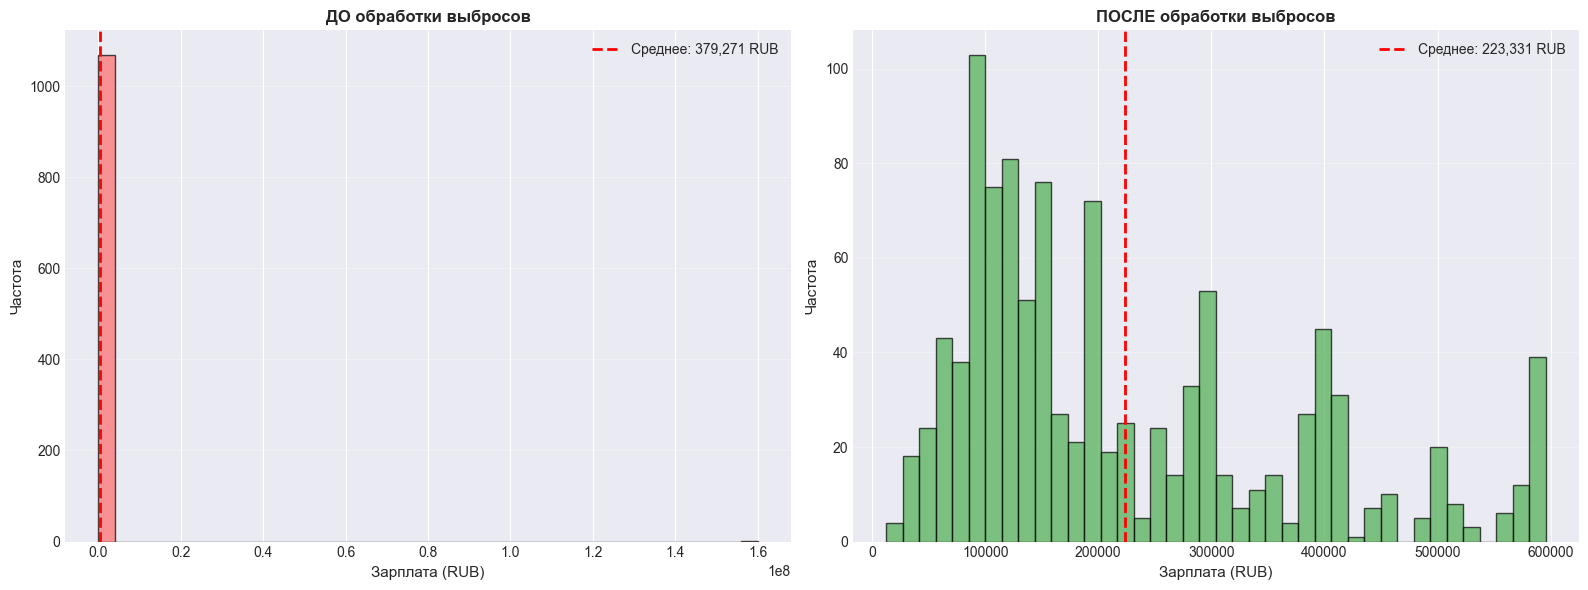

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# До обработки
axes[0].hist(
    df_combined["salary_rub"].dropna(),
    bins=40,
    edgecolor="black",
    alpha=0.7,
    color="#FF6B6B",
)
axes[0].set_title("ДО обработки выбросов", fontsize=12, fontweight="bold")
axes[0].set_xlabel("Зарплата (RUB)", fontsize=11)
axes[0].set_ylabel("Частота", fontsize=11)
axes[0].axvline(
    df_combined["salary_rub"].mean(),
    color="red",
    linestyle="--",
    linewidth=2,
    label=f"Среднее: {df_combined['salary_rub'].mean():,.0f} RUB",
)
axes[0].legend()
axes[0].grid(axis="y", alpha=0.3)

# После обработки
axes[1].hist(
    df_combined["salary_rub_clean"].dropna(),
    bins=40,
    edgecolor="black",
    alpha=0.7,
    color="#4CAF50",
)
axes[1].set_title(
    "ПОСЛЕ обработки выбросов", fontsize=12, fontweight="bold"
)
axes[1].set_xlabel("Зарплата (RUB)", fontsize=11)
axes[1].set_ylabel("Частота", fontsize=11)
axes[1].axvline(
    df_combined["salary_rub_clean"].mean(),
    color="red",
    linestyle="--",
    linewidth=2,
    label=f"Среднее: {df_combined['salary_rub_clean'].mean():,.0f} RUB",
)
axes[1].legend()
axes[1].grid(axis="y", alpha=0.3)


plt.tight_layout()
plt.show()

#### 2.1.7 Итоговая сводка

In [34]:
summary_data = {
    "Метрика": [
        "Среднее (до)",
        "Среднее (после)",
        "Медиана (до)",
        "Медиана (после)",
        "Мин (до)",
        "Мин (после)",
        "Макс (до)",
        "Макс (после)",
        "Выбросов (%)",
    ],
    "Датасет 1": [
        f"{df_combined['salary_rub'].mean():,.0f} RUB",
        f"{df_combined['salary_rub_clean'].mean():,.0f} RUB",
        f"{df_combined['salary_rub'].median():,.0f} RUB",
        f"{df_combined['salary_rub_clean'].median():,.0f} RUB",
        f"{df_combined['salary_rub'].min():,.0f} RUB",
        f"{df_combined['salary_rub_clean'].min():,.0f} RUB",
        f"{df_combined['salary_rub'].max():,.0f} RUB",
        f"{df_combined['salary_rub_clean'].max():,.0f} RUB",
        f"{outliers_df['outliers_percent']:.1f}%",
    ],
}

summary_df = pd.DataFrame(summary_data)
print("📊 ИТОГОВАЯ СВОДКА ПО ОБРАБОТКЕ ЗАРПЛАТ")
display(summary_df)


📊 ИТОГОВАЯ СВОДКА ПО ОБРАБОТКЕ ЗАРПЛАТ


,Метрика,Датасет 1
0,Среднее (до),"379,271 RUB"
1,Среднее (после),"223,331 RUB"
2,Медиана (до),"170,000 RUB"
3,Медиана (после),"170,000 RUB"
4,Мин (до),"12,500 RUB"
5,Мин (после),"12,500 RUB"
6,Макс (до),"160,000,000 RUB"
7,Макс (после),"595,556 RUB"
8,Выбросов (%),2.7%


**Вывод по Этапу 2.1:**

1. ✅ **Конвертация валют**: Все зарплаты приведены к единой валюте (RUB) для корректного сравнения
2. ✅ **Выявление выбросов**: Использован метод IQR (межквартильный размах)

- Датасет 1: {outliers_df1['outliers_count']} выбросов ({outliers_df1['outliers_percent']:.1f}%)
- Датасет 2: {outliers_df2['outliers_count']} выбросов ({outliers_df2['outliers_percent']:.1f}%)

3. ✅ **Обработка выбросов**:

- Если < 5% выбросов → оставлены (могут быть реальными высокими зарплатами)
- Если ≥ 5% выбросов → применена winsorization (обрезка экстремальных значений)

4. ✅ **Создана колонка `salary_rub_clean`** для дальнейшего анализа

**Важно:** В дальнейшем анализе используем колонку `salary_rub_clean` вместо `salary`!


## 2.2 Создание признаков `"python"`, `"sql"`, `"ml"`, `"dl"`



➡️ Создадим признаки под названием `"python"`, `"sql"`, `"ml"`, `"dl"`. 

💡 Это категориальные бинарные признаки. Если в вакансии упоминается навык, то признак кодируется `1` — иначе `0`.

### 2.2.1 Создание признака `"python"`

In [35]:
df_combined['python'] = df_combined['skills'].apply(lambda x: "python" in str(x).lower()) # "Отмечаем" все вакансии, где в поле "навыки" есть упоминание "python"

### 2.2.2 Создание признака `"sql"`

💻 Поскольку поиск целесообразно осуществлять сразу по нескольким ключевым словам, определим дополнительно функцию `determine_presence_by_keywords`.

In [36]:
def determine_presence_by_keywords(keywords_arr: list[str]) -> bool:
    """Определить, есть ли в строке ключевые слова"""
    def inner_func(x):
        str_x = str(x)

        for word in keywords_arr: 
            if word in str_x.lower(): return True
        
        return False

    return inner_func


df_combined['sql'] = df_combined['skills'].apply(determine_presence_by_keywords(["sql", "db", "database", "база", "бд"])) # "Отмечаем" все вакансии, где в поле "навыки" есть упоминание нужных ключевых слов

### 2.2.3 Создание признака `"ml"`

In [37]:
df_combined['ml'] = df_combined['skills'].apply(determine_presence_by_keywords(["ml", "machine", "машинное"])) # "Отмечаем" все вакансии, где в поле "навыки" есть упоминание нужных ключевых слов

### 2.2.4 Создание признака `"dl"`

In [38]:
df_combined['dl'] = df_combined['skills'].apply(determine_presence_by_keywords(["dl", "deep", "глубокое"])) # "Отмечаем" все вакансии, где в поле "навыки" есть упоминание нужных ключевых слов

## 2.3 Создание признака `"skills_number"`

➡️ Создадим признак `"skills_number"`. 

💡 Данный признак будет содержать общее количество навыков, которые работодатель указывает в требованиях для каждой вакансии.

In [39]:
df_combined['skills_number'] = df_combined['skills'].apply(lambda x: len(str(x).split(", ")))
df_combined['skills_number'].head(5)

0     5
1     9
2     7
3    11
4     8
Name: skills_number, dtype: int64

⚠️Следует учитывать наличие значительного числа пропусков в данном поле. Представленный выше код при наличии `na` вернул `1`. Из-за большого числа пропусков неполные наблюдения следует исключить из выборки при анализе этого признака.

In [40]:
missing_skills_data = int(df_combined['skills'].isna().sum())
print(f"Данные отсутствуют в {int(missing_skills_data / df_combined.shape[0] * 100)} % наблюдений")

Данные отсутствуют в 28 % наблюдений


## 2.4 Создание "географических" признаков

➡️ Создадим "географические" признаки. 

<ul>
    <li>Признак <code>"moscow_job"</code> — является ли вакансия "московской".</li>
    <li>Признак <code>"russia_job"</code> — является ли вакансия "российской".</li>
</ul>

"Московские" вакансии образуют подмножество "российских" вакансий.

### 2.4.1 Создание признака `"moscow_job"`

In [41]:
df_combined['moscow_job'] = df_combined['location'].apply(determine_presence_by_keywords(['москва']))
print(f"В датасете {int(df_combined['moscow_job'].sum() / df_combined.shape[0] * 100)} % вакансий — \"московские\"")

В датасете 32 % вакансий — "московские"


### 2.4.2 Создание признака `"russia_job"`

💻 Для поиска "российских" вакансий определим функцию `has_cyrillic`. Функция возвращает `True`, если в признаке `"location"` есть кириллические символы, иначе `False`.

In [42]:
def has_cyrillic(s) -> bool:
    """Определить, содержит ли строка кириллические символы"""
    s = str(s)
    return any('А' <= ch <= 'я' or ch in 'Ёё' for ch in s)

df_combined['russia_job'] = df_combined['location'].apply(has_cyrillic)

print(f"В датасете {int(df_combined['russia_job'].sum() / df_combined.shape[0] * 100)} % вакансий — \"российские\"")

В датасете 58 % вакансий — "российские"


## 2.5 Создание признака `"min_exp"`

➡️ Создадим признак `"min_exp"`.

💡 Этот признак отражает минимальные требования к опыту соискателя. 

💻 Определим вспомогательную функцию `get_min_exp`.

In [43]:
def get_min_exp(exp: str):
    """Определить минимальные требования к опыту соискателя"""
    return int(exp[0])

df_combined["min_exp"] = df_combined['experience'].apply(get_min_exp)


## 2.6 Создание признака `"skill_value"`

➡️ Создадим признак `"skill_value"`.

💡 Этот признак отражает стоимость одного навыка соискателя в вакансии.

In [44]:
df_combined["skill_value"] = df_combined['salary_rub_clean'] / df_combined['skills_number']

# Этап 3: Разведывательный анализ данных

## 3.1 Анализ признаков `"python"`, `"sql"`, `"ml"`, `"dl"`

➡️ Определим востребованность навыков, рассчитав % работодателей, для которых эти навыки являются актуальными.

💡 Было решено проанализировать "hard skills" отдельно.

In [45]:
python_relevance = round(df_combined['python'].sum() / df_combined.shape[0], 2)
print(f"Python востребован у {python_relevance * 100} % работодателей")

Python востребован у 13.0 % работодателей


In [46]:
sql_relevance = round(df_combined['sql'].sum() / df_combined.shape[0], 2)
print(f"SQL востребован у {sql_relevance * 100} % работодателей")

SQL востребован у 19.0 % работодателей


In [47]:
ml_relevance = round(df_combined['ml'].sum() / df_combined.shape[0], 2)
print(f"ML востребован у {ml_relevance * 100} % работодателей")

ML востребован у 15.0 % работодателей


In [48]:
dl_relevance = round(df_combined['dl'].sum() / df_combined.shape[0], 2)
print(f"DL востребован у {dl_relevance * 100} % работодателей")

DL востребован у 2.0 % работодателей


📊 Промежуточные результаты:

<table>
    <tr>
        <th>Навык</th>
        <th>Востребованность</th>
    </tr>
    <tr>
        <td>SQL</td>
        <td style="text-align: center">19 %</td>
    </tr>
    <tr>
        <td>Machine learning</td>
        <td style="text-align: center">15 %</td>
    </tr>
    <tr>
        <td>Python</td>
        <td style="text-align: center">13 %</td>
    </tr>
    <tr>
        <td>Deep learning</td>
        <td style="text-align: center">2 %</td>
    </tr>
</table>

### 🔎 Таким образом, SQL является самым востребованным навыком у работодателей, а DL — самым непопулярным. 

💡 Однако полученные результаты могут не в полной мере отражать реальное состояние рынка Data Science. Во многих вакансиях необходимые навыки не указываются явно, поскольку **предполагается**, что соискатель, обладающий соответствующим опытом, уже ими владеет. Следует также учитывать, что владение одним навыком нередко подразумевает владение другим. Например, наиболее распространённым языком программирования для задач машинного обучения является Python (*согласно открытым источникам*). Поэтому вакансии, в которых требования к ML сформулированы явно, зачастую предполагают и владение Python.


In [49]:
ml_py_corr = round(df_combined['python'].corr(df_combined['ml']), 2)

print(f'Между владением Python и ML "заметная" корреляция {ml_py_corr}')

Между владением Python и ML "заметная" корреляция 0.45



⚠️ Полученные результаты требуют проверки посредством дополнительного исследования, выходящего за рамки данной работы. Тем не менее можно с высокой долей уверенности утверждать, что реальная востребованность указанных навыков **превышает** полученные оценки.

## 3.2 Анализ зарплат

➡️ Проанализируем данные о зарплатах ~~(*самое интересное*)~~, используя созданные в разделе 2 признаки.

### 3.2.1 Различие между "российскими зарплатами" и "зарубежными"

In [50]:
df_combined.groupby("russia_job")['salary_rub_clean'].median()

russia_job
False    303615.0
True     120000.0
Name: salary_rub_clean, dtype: float64

📊 Медиана "российских" зарплат ниже мадианы "зарубежных" зарплат в 2,5 раза.

### 3.2.2 Различие между "московскими" зарплатами и "зарубежными"

➡️ Очистим датасет от данных российских регионов.

In [51]:
df_combined_without_regions = df_combined[(df_combined['moscow_job'] == 1) | (df_combined['russia_job'] == 0)]

df_combined_without_regions.groupby("moscow_job")['salary_rub_clean'].median()

moscow_job
False    303615.0
True     150000.0
Name: salary_rub_clean, dtype: float64

📊 Медиана "московских" зарплат ниже мадианы "мировых" зарплат в 2 раза.

### 3.2.3 Различие между "московскими" и "российскими" зарплатами

➡️ Очистим датасет от "мировых" данных.

In [52]:
df_combined_only_russia = df_combined[(df_combined['moscow_job'] == 1) | (df_combined['russia_job'] == 1)]

df_combined_only_russia.groupby('moscow_job')['salary_rub_clean'].median()

moscow_job
False    110000.0
True     150000.0
Name: salary_rub_clean, dtype: float64

📊 Медиана "московских" зарплат выше мадианы "региональных российских" зарплат в 1,3 раза.

### 🔎 Таким образом, "зарубежные" зарплаты зачастую больше "московских", а "московские" больше "российских". 

💡 Это может объясняться как общими тенденциями рынка, так и другими факторами. Например, количество "Big-Tech" компаний в мире, очевидно, больше, чем в Москве и в России. Они предлагают лучшие рабочие условия. На агрегаторе time jobs в основном представлены именно такие компании, а на hh больше представителей среднего и малого бизнесов.

⚠️ Полученные результаты требуют проверки посредством дополнительного исследования, выходящего за рамки данной работы.

## 3.3 Анализ рынка специалистов

➡️ Проанализируем данные о требовательности работодателей в Москве, России и мире.

💡 В этом нам поможет признак `"skills_number"`. Чем больше "скиллов" указано в вакансии, тем требовательнее работодатель.

⚠️ Также не стоит забывать о большом числе пропусков в поле `"skills"`. "Избавимся" от них во время анализа.

In [53]:
df_combined_sc = df_combined.dropna(subset=['skills'])

### 3.3.1 Требования, выдвигаемые к кандидатам в России и мире

In [54]:
df_combined_sc.groupby("russia_job")['skills_number'].mean()

russia_job
False    9.630273
True     7.778082
Name: skills_number, dtype: float64

📊 В среднем зарубежные компании требовательнее российских.

### 3.3.2 Требования, выдвигаемые к кандидатам в Москве и мире

In [55]:
df_combined_sc_temp = df_combined_sc[(df_combined_sc['moscow_job'] == 1) | (df_combined_sc['russia_job'] == 0)]

df_combined_sc_temp.groupby("moscow_job")['skills_number'].mean()

moscow_job
False    9.630273
True     8.062802
Name: skills_number, dtype: float64

📊 В среднем зарубежные компании требовательнее московских.

### 3.3.3 Требования, выдвигаемые к кандидатам в Москве и России

In [56]:
moscow_requirements = df_combined_sc[df_combined_sc['moscow_job'] == 1]['skills_number'].mean()
russia_requirements = df_combined_sc[(df_combined_sc['russia_job'] == 1) & (df_combined_sc['moscow_job'] == 0)]['skills_number'].mean()

print(f"В Москве работодатели в среднем требуют от соискателя владения {int(moscow_requirements)}-ю навыками")
print(f"В России работодатели в среднем требуют от соискателя владения {int(russia_requirements)}-ю навыками")

В Москве работодатели в среднем требуют от соискателя владения 8-ю навыками
В России работодатели в среднем требуют от соискателя владения 7-ю навыками


📊 Таким образом, требования московских и российских компаний зачастую совпадают

### 🔎 В среднем зарубежные работодатели требовательнее российских. 

💡 Однако разница зачастую составляет 1-2 навыка. Это может объясняться особенностью агрегаторов.

## 3.4 Построение корреляционной матрицы

➡️ Построим корреляционную матрицу. Работаем с датасетом `df_combined_sc`

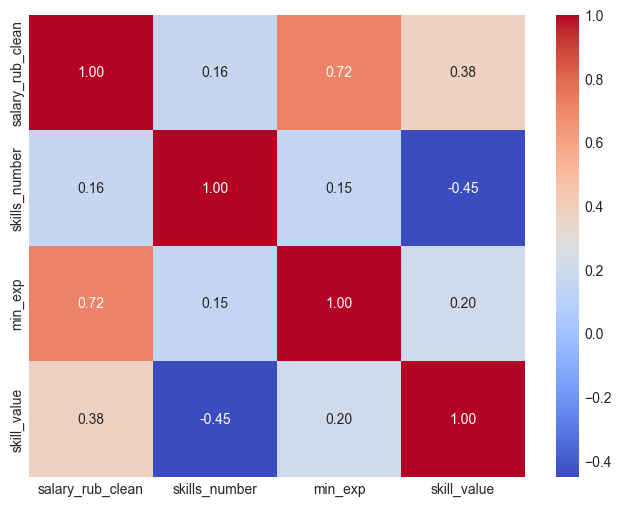

In [57]:
corr = df_combined_sc[['salary_rub_clean', "skills_number", "min_exp", "skill_value"]].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

### 🔎 Работодатели в среднем готовы платить больше опытным специалистам. Корреляция 0.72 — "значительная".

⚠️ Дополнительная проверка этой гипотезы представлена в разделе 4.2

### 🔎 Число навыков почти не влияет на заработную плату. Работодатели ценят как специалистов широкого профиля, обладающих разносторонними компетенциями, так и специалистов узкого профиля с глубокими знаниями в конкретной области. Корреляция 0.16 — "слабая".

## 3.5 Выявление "чистой" стоимости "hard skills" на рынке

💡 Под "hard skills" понимаются Python, SQL, ML, DL.

➡️ Вычислим их стоимость.

💻 Для автоматизации вычислений определим функцию `calculate_nv_and_print`.

In [58]:
def calculate_nv_and_print(df: pd.DataFrame, column: str, skill_name: str):
    """Определить "чистую" стоимость навыка"""
    net_value = df[df[column] == 1]['skill_value'].median()
    print(f'"Чистая" стоимость {skill_name} составляет {round(net_value, 2)} RUB')

In [59]:
calculate_nv_and_print(df_combined, "python", "Python")
calculate_nv_and_print(df_combined, "ml", "ML")
calculate_nv_and_print(df_combined, "dl", "DL")
calculate_nv_and_print(df_combined, "sql", "SQL")

"Чистая" стоимость Python составляет 31356.0 RUB
"Чистая" стоимость ML составляет 30000.0 RUB
"Чистая" стоимость DL составляет 27784.29 RUB
"Чистая" стоимость SQL составляет 24821.25 RUB


### 🔎 Таким образом, Python — это самый "дорогой" технический навык рынке. За владение им работодатели готовы заплатить 31 000 рублей.

💡 Следом идут ML (30 000 рублей), DL (28 000 рублей) и SQL (25 000 рублей). 

# Этап 4: Визуализация данных

➡️ Проверим некоторые гипотезы с помощью визуализации данных

## 4.1 Географическая востребованность навыков

💡 Согласно разделу 3.1 Python, SQL и ML являются востребованными на рынке "hard skills".

➡️ Проверим географическую востребованность этих навыков и построим соответствующий график.

⛔ Признак `"dl"` не будет анализироваться, так как он указан в явном виде только в 2 % вакансий.

💻 Поскольку предстоит построить несколько круговых диаграмм, автоматизируем этот процесс путем определения функции `pie_visualize`.

In [60]:
def pie_visualize(visual_data: pd.Series, title: str, labels: list[str]):
    """Визуализация с помощью круговой диаграммы"""
    sns.set_theme(style="whitegrid")

    fig, ax = plt.subplots(figsize=(7, 7))
    wedges, texts, autotexts = ax.pie(
        visual_data,
        labels=labels,
        autopct="%1.1f%%",
        startangle=90,
        colors=sns.color_palette("pastel"),
        wedgeprops={"edgecolor": "black"},
    )

    for autotext in autotexts:
        autotext.set_fontsize(12)
        autotext.set_color("black")
        autotext.set_weight("bold")

    ax.set_title(title, fontsize=16, weight="bold")

    plt.show()


### 4.1.1 Географическая востребованность Python

➡️ Проверим географическую востребованность Python.

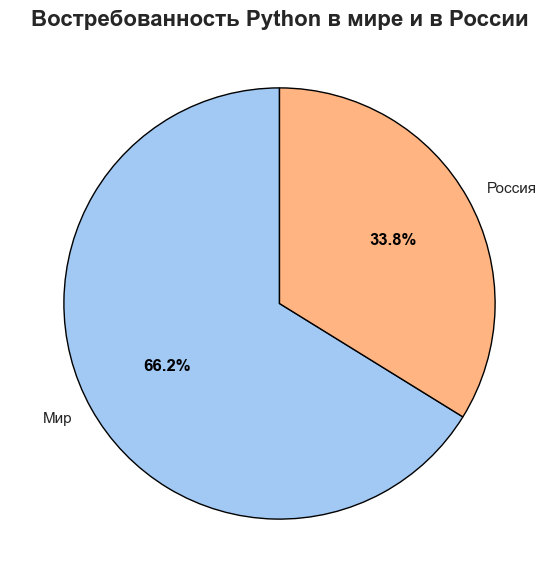

In [61]:
visual_data_1 = df_combined.groupby("russia_job")['python'].sum()

pie_visualize(visual_data_1, "Востребованность Python в мире и в России", ['Мир', "Россия"])


📊 В среднем Python больше востребован в мире, чем в России.

### 4.1.2 Географическая востребованность SQL

➡️ Проверим географическую востребованность SQL.

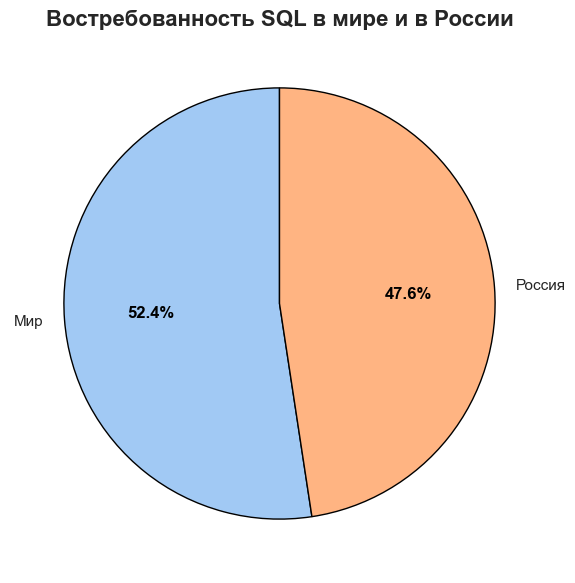

In [62]:
visual_data_2 = df_combined.groupby("russia_job")['sql'].sum()

pie_visualize(visual_data_2, "Востребованность SQL в мире и в России", ['Мир', "Россия"])

📊 Востребованность SQL в мире и России примерно одинакова.

### 4.1.3 Географическая востребованность ML

➡️ Проверим географическую востребованность ML.

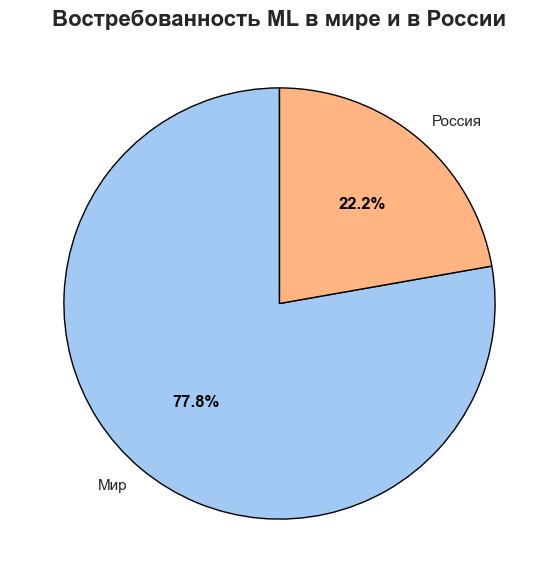

In [63]:
visual_data_3 = df_combined.groupby("russia_job")['ml'].sum()

pie_visualize(visual_data_3, "Востребованность ML в мире и в России", ['Мир', "Россия"])

📊 ML больше востребован в мире, чем в России.

### 🔎 Зарубежные компании чаще требуют от соискателя работы владения техническими навыками

## 4.2 Проверка выводов раздела 3.4

➡️ Построим "скрипичный" график распределения зарплат и минимального опыта работы для проверки выводов раздела 3.4

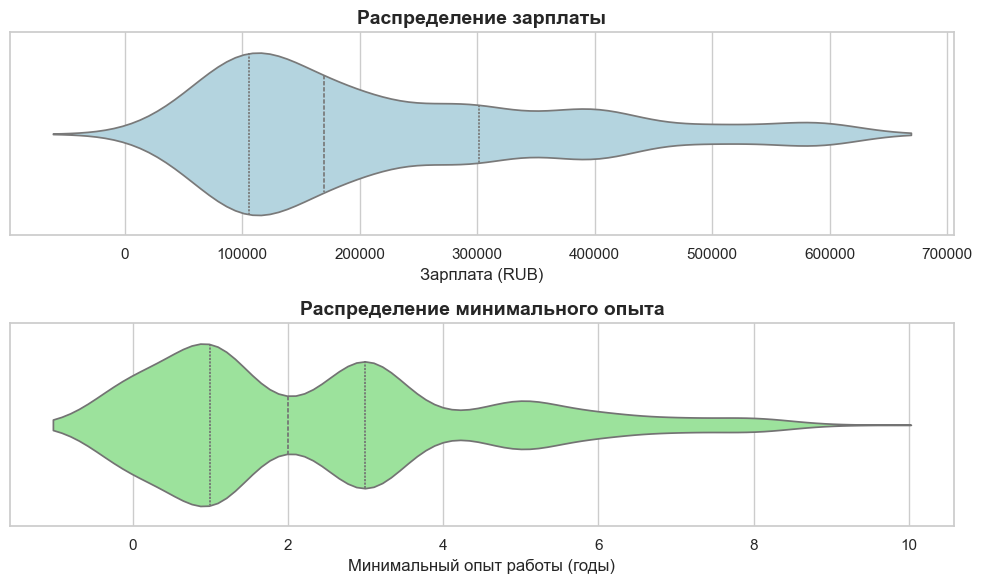

In [64]:
sns.set_theme(style="whitegrid")

fig, axes = plt.subplots(2, 1, figsize=(10,6), sharex=False)

sns.violinplot(
    x=df_combined['salary_rub_clean'],
    ax=axes[0], 
    color='lightblue', 
    inner='quartile'
)
axes[0].set_title("Распределение зарплаты", fontsize=14, weight='bold')
axes[0].set_xlabel("Зарплата (RUB)")
axes[0].set_ylabel("")

sns.violinplot(
    x=df_combined['min_exp'],  
    ax=axes[1], 
    color='lightgreen', 
    inner='quartile'
)
axes[1].set_title("Распределение минимального опыта", fontsize=14, weight='bold')
axes[1].set_xlabel("Минимальный опыт работы (годы)")
axes[1].set_ylabel("")

plt.tight_layout()
plt.show()

⚠️ Распределение зарплаты и минимального опыта работы примерно совпадают. На второй "скрипке" есть небольшой провал в точке 2, который можно объяснить особенностью агреггаторов (в hh.ru более строгие границы для опыта работы). Таким образом, можно скорректировать вывод раздела 3.4. 

### 🔎 Рынок оценивает опыт как ключевой фактор вознаграждения.

## 4.3 Сравнение популярности навыка (в т.ч. "soft-skills") и медианной заработной платы

➡️ Построим соответствующую столбчатую диаграмму

💡 В этом нам поможет функция `explode`, с помощью которой будет создано отдельное наблюдение для каждого навыка. 

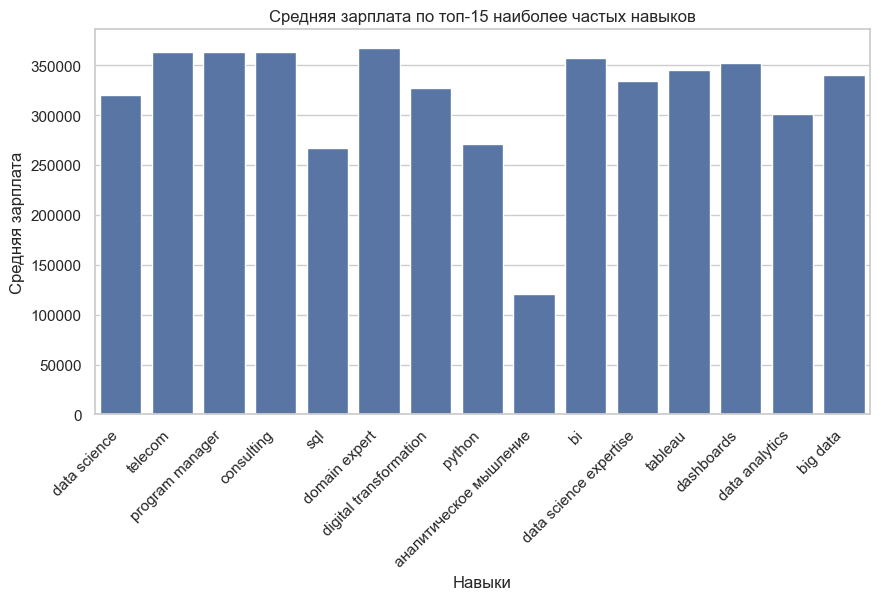

In [65]:
df_exploded = df_combined.assign(skill=df_combined["skills"].str.split(",")).explode(
    "skill"
)

df_exploded["skill"] = df_exploded["skill"].str.strip().str.lower()
skills_stats = (
    df_exploded.groupby("skill")
    .agg(count=("skill", "size"), mean_salary=("salary_rub_clean", "mean"))
    .sort_values("count", ascending=False)
)
top_n = 15
skills_top = skills_stats.head(top_n).reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(data=skills_top, x="skill", y="mean_salary")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Средняя зарплата")
plt.xlabel("Навыки")
plt.title("Средняя зарплата по топ-15 наиболее частых навыков")

plt.show()

### 🔎 Самые распространенные навыки зачастую хорошо оплачиваются.

💡 Технические навыки наиболее востребованы. Однако встречаются также и "soft-skills", за которые работодатель готов хорошо заплатить. Например, аналитическое мышление.

⚠️ Стоит также учитывать, что построенный график никак не учитывает особенности вакансий и не отражает "чистую" стоимость навыка.

# Выводы

🔎 В результате анализа были выдвинуты следующие исследовательские гипотезы:

1. SQL является самым популярным "hard skill" на рынке.
2. "Зарубежные" зарплаты зачастую больше "московских", а "московские" больше "российских". 
3. Медианная зарплата data scientistа в России — 120 000 рублей.
4. Зарубежные компании требовательнее российских. В среднем от специалиста требуется владение 8-10 навыками.
5. Работодатели ценят опытных специалистов. На рынке data science работу могут найти специалисты как широкого, так и узкого профиля.
6. Python является самым дорогим "hard skill" на рынке. 
7. Зарубежные компании чаще требуют от соискателя работы владения техническими навыками.
8. Самые распространенные навыки зачастую самые высокооплачиваемые. 

📝 Формальные требования соблюдены:


- ✅ Проведен парсинг веб-страниц.
- ✅ Число строк в датасете — 1000.
- ✅ Число признаков в начальном датасете 7.
- ✅ Работа структурирована, выводы указаны.
- ✅ Данные предварительно обработаны.
- ✅ Создано 9 новых признаков.
- ✅ Построена корреляционная матрица, применены фильтры / groupby для анализа данных.
- ✅ Построено 5 графиков разных видов.

# Спасибо за внимание 🥳🤩